# **<span style='color:red'>Brain Tumer Binary Classification</span>**

## **About Dataset**

I have take this Data From [Kaggle](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

## **What is Brain Tumer:**
According to [Cleveland Clinic](https://my.clevelandclinic.org/health/diseases/6149-brain-cancer-brain-tumor)
A brain tumor is an abnormal growth or mass of cells in or around your brain. Together, spinal tumors and brain tumors are called central nervous system (CNS) tumors. Brain tumors can be malignant (cancerous) or benign (noncancerous). Some tumors grow quickly, while others are slow growing.

### **GOAL:**

Our Goal in this project is to create a Deep Learning CNN model which will take MRI picture of brain tumer and tell weather the person has brain tumer of not.

So for this we will build our own `CNN` model using `tensorflow`.



In [2]:
# ### Connecting with Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

### **Importing Libraries**

In [3]:
## Import System Libraries
import os
import time
import itertools
from PIL import Image

## Import Data Preprocessing and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import imghdr
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Import Libraries for Model Building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

## Remove Warning
import warnings
warnings.filterwarnings('ignore')

### Checking the GPU Availability

### Removing un-necessary Images formate

In [4]:
data_dir = '/content/drive/MyDrive/Brain-Tumer-Binary-Classification/Data'

### Checking an Analyzing an image

In [5]:
image = cv2.imread(os.path.join(data_dir, 'yes', 'Y1.jpg'))

In [6]:
### Checking the shape of a sinple image
image.shape

(218, 180, 3)

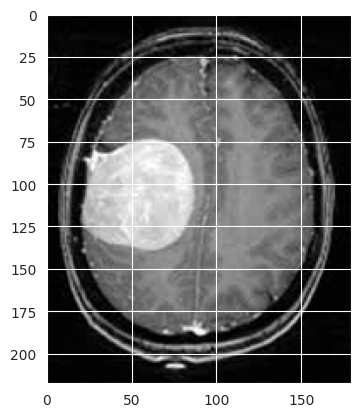

In [7]:
## Checking the image with gray scale
plt.imshow(image)

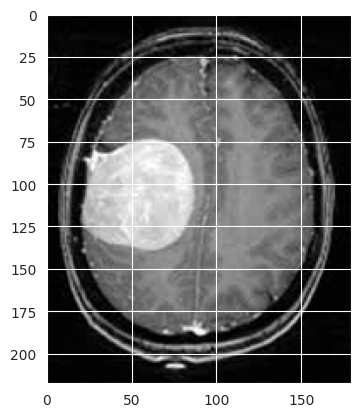

In [8]:
## Reading the image through RGB
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

As we see there is no such difference in RGB and GRAY scale in this image

In [9]:
## Images extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
## Checking the image through for loop
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

## **Loading the Data**

In [11]:
# tf.data.Dataset?

In [12]:
# tf.keras.utils.image_dataset_from_directory??

In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 250 files belonging to 2 classes.


#### This `tensflow.keras.utils.image_dataset_from_directory` give us a very nice packagw. This will automatically get the class from folder name and also preprocess the data a little bit.

But it will convert all the data into Generators.

In [16]:
### Creating an iterator to iterator over the list of items
data_iterator = data.as_numpy_iterator()

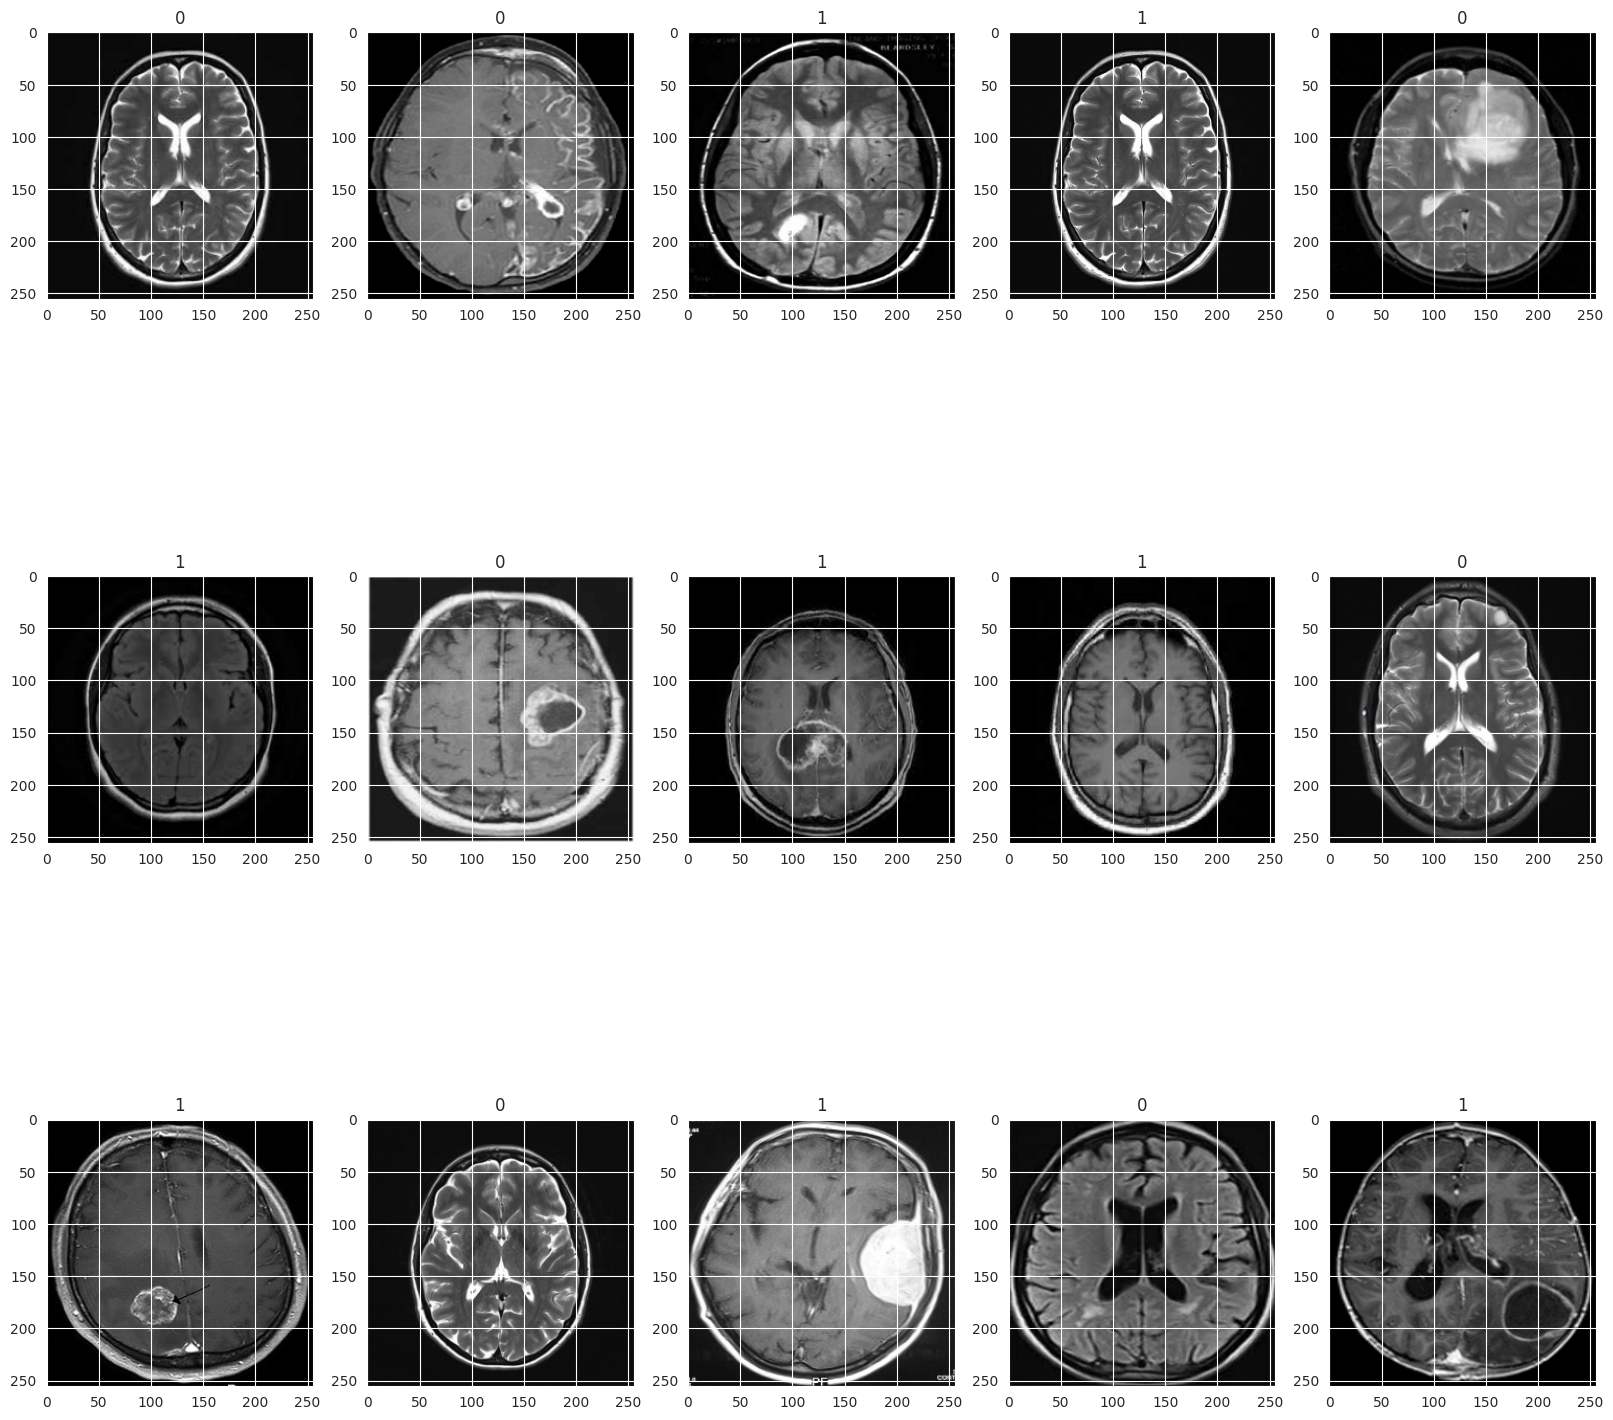

In [18]:
batch = data_iterator.next()
### Visualizing the images
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20, 20))
for index, img in enumerate(batch[0][15:30]):
  row = index // 5  # Calculate the row index
  col = index % 5  # Calculate the column index
  ax[row, col].imshow(img.astype(int)) # Index into the 2D array of axes
  ax[row, col].title.set_text(batch[1][index])
plt.show()

### Scale the Data

In [19]:
data = data.map(lambda x, y: (x/255, y))

### Splitting the Data

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) +1 +1

In [28]:
len(data)

8

In [29]:
val_size+train_size+test_size

8

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## **Building the Model**

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(8, (3,3), 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,921 (1.57 MB)

 Trainable params: 410,921 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
### Compiling the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

### **Training the Model**

In [34]:
data_dir

'/content/drive/MyDrive/Brain-Tumer-Binary-Classification/Data'

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
logdir = '/content/drive/MyDrive/Colab Notebooks/Image Classification Deep Learjning/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.6293 - loss: 0.6614 - val_accuracy: 0.6562 - val_loss: 0.6576
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.7451 - loss: 0.6032 - val_accuracy: 0.7812 - val_loss: 0.4842
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.7408 - loss: 0.5511 - val_accuracy: 0.7188 - val_loss: 0.6675
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.7617 - loss: 0.5246 - val_accuracy: 0.6562 - val_loss: 0.6198
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.7735 - loss: 0.4972 - val_accuracy: 0.8125 - val_loss: 0.4707
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.8365 - loss: 0.4258 - val_accuracy: 0.6875 - val_loss: 0.6919
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - accuracy: 0.8081 - loss: 0.4664 - val_accuracy: 0.8438 - val_loss: 0.4492
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.7831 - loss: 0.4611 - val_accuracy: 0.7812 - val_loss

### Plot the Performence

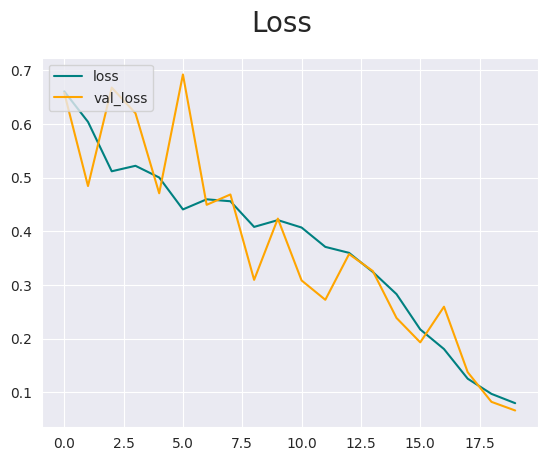

In [79]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

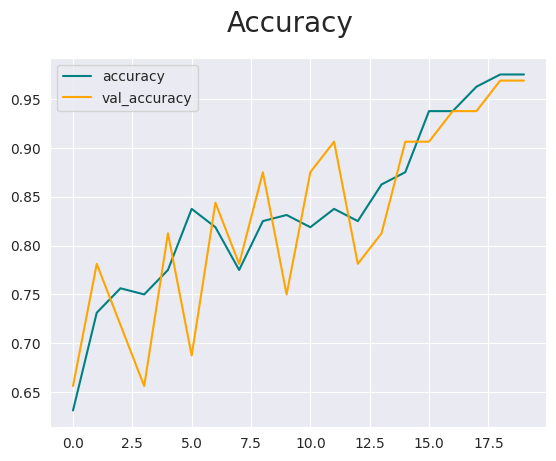

In [80]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Checking the Loss of model

In [81]:
loss = model.evaluate(test, verbose=1)
print('Accuracy Score: ', loss[1])
print('LoSS Score: ', loss[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - accuracy: 0.9781 - loss: 0.0619
Accuracy Score:  0.982758641242981
LoSS Score:  0.052761245518922806


## **Evaluation**

In [82]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, F1Score
pre = Precision()
re = Recall()
f1 = F1Score()
acc = BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator():
  X, y = batch
  y_pred = model.predict(X)
  pre.update_state(y, y_pred)
  re.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [84]:
print(f" Precison Score: {pre.result()},\n Recall Score: {re.result()},\n Accuracy Score: {acc.result()}")

 Precison Score: 1.0,
 Recall Score: 1.0,
 Accuracy Score: 1.0


## **Testing the Model**

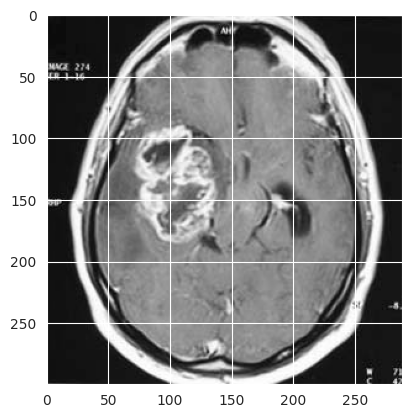

In [66]:
test_img = cv2.imread('/content/drive/MyDrive/Brain-Tumer-Binary-Classification/Data/yes/Y14.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [88]:
test_dir = '/content/drive/MyDrive/Brain-Tumer-Binary-Classification/Data/testing'

def with_without_tumer(img_path):
  img_full_path = os.path.join(test_dir, img_path) # Construct the full path to the image
  img = cv2.imread(img_full_path)
  if img is None:
    print(f"Error: Could not load image at '{img_full_path}'") # Check if image loading was successful
    return None

  resize = tf.image.resize(img, (256, 256))
  predict = model.predict(np.expand_dims(resize/255, 0))
  if predict > 0.5:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    return "The person has Brain Tumer"
  else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    return "The Person Does not have Brain Tumer"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


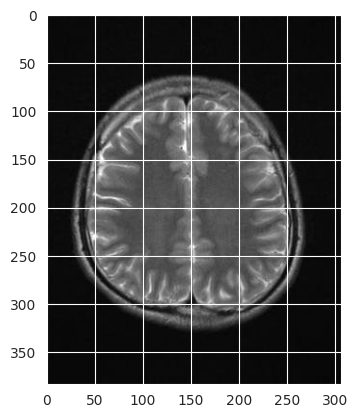

'The Person Does not have Brain Tumer'

In [92]:
with_without_tumer('without-tumer.png')

## **Saving the Model**

In [93]:
model.save(os.path.join('/content/drive/MyDrive/Brain-Tumer-Binary-Classification/Model', 'brain-tumer-detection-binary.h5'))